# Topic Modeling with Unsupervised Learning

Interactive visualization of full and truncated (randomized) SVD and NMF for unsupervised learning of faces. Many parts taken from Jupyter notebook '2. Topic Modeling with NMF and SVD' by Professor Rachel Thomas.

In [1]:
import numpy as np
import scipy as sp
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize
import ipdb

init_notebook_mode(connected=True)
%matplotlib inline

## Facial Recognition

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
_, rows, cols = lfw_people.images.shape

# Transpose so that each column contains ravelled vector of image
data = normalize(lfw_people.data.transpose())
data.shape

(2914, 1288)

Here are some of the images from the dataset:

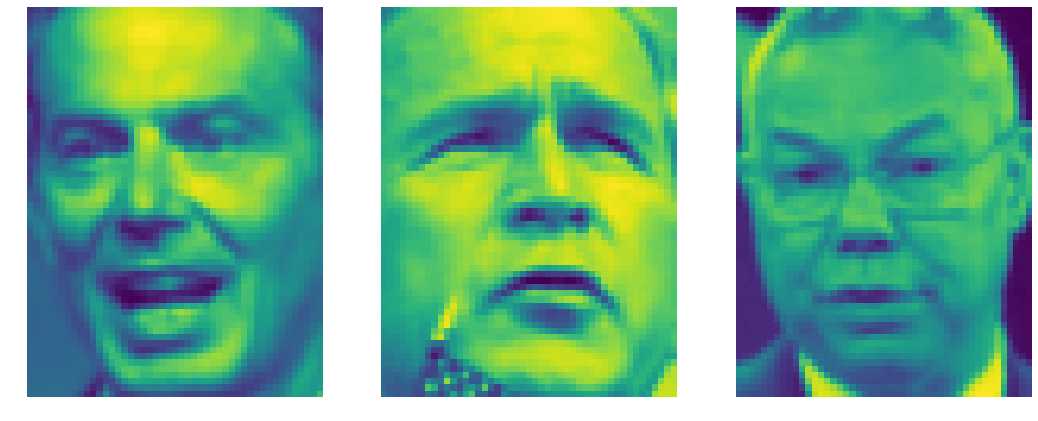

In [56]:
fig = plt.figure(figsize=(18,18))

for i in range(1,4):
    fig.add_subplot(1,3,i)
    plt.imshow(lfw_people.images[i])
    plt.axis('off')

### Truncated SVD

In [27]:
n_components = 50
%time u, s, v = decomposition.randomized_svd(data, n_components)

u.shape, s.shape, v.shape

CPU times: user 234 ms, sys: 6.45 ms, total: 241 ms
Wall time: 127 ms


((2914, 50), (50,), (50, 1288))

Here are the features extracted:

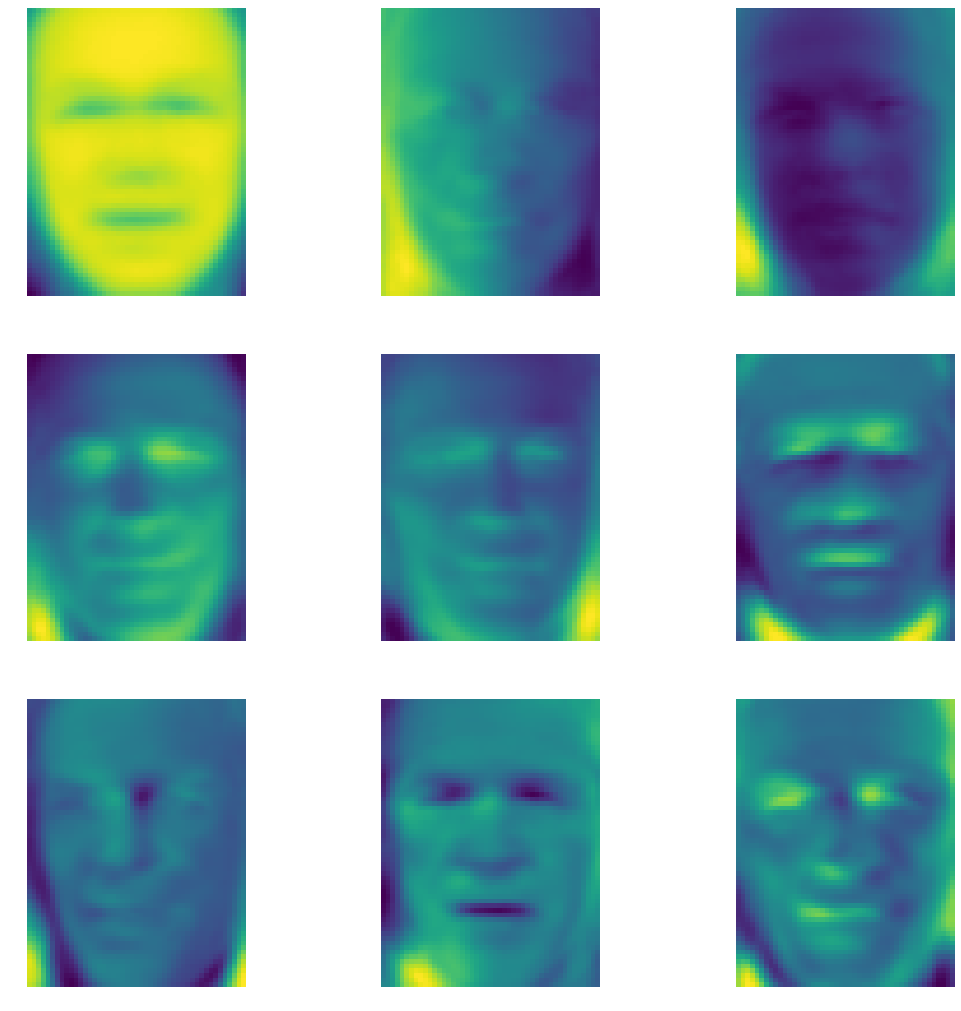

In [57]:
fig = plt.figure(figsize=(18,18))

for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(u[:,i - 1].reshape(rows,cols))
    plt.axis('off')

The singular values of the decomposition show us that a few features are the most important in the images.

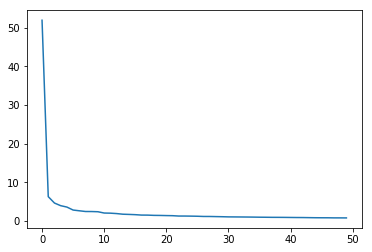

In [29]:
plt.plot(s)

Make your own face with the feature faces

In [72]:
from ipywidgets import interact

def makeface(u, w, rows, cols):
    return (u @ w).reshape(rows, cols)

def newface(f1, f2, f3):
    return np.reshape(f1 + f2 + f3, (rows,cols))

(-0.5, 46.5, 61.5, -0.5)

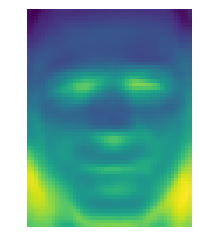

In [90]:
no_features = 5
# w = np.zeros(no_features).transpose()
# w[:no_features] = [40, 10, 2, 1]
w = 40 * np.random.rand(no_features, 1)

newface = makeface(u[:,:no_features], w, rows, cols)

plt.imshow(newface)
plt.axis('off')

In [61]:
interact(makeface, x=10, y=10, z=10)


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=10, description='…

<function __main__.makeface(x, y, z)>

### Non-Negative Matrix Factorization (NMF)

In [7]:
n_components = 50
nmf_model = decomposition.NMF(n_components=n_components, random_state=1)

%time W = nmf_model.fit_transform(data)
H = nmf_model.components_

W.shape, H.shape

CPU times: user 11.8 s, sys: 123 ms, total: 11.9 s
Wall time: 6.06 s


((2914, 50), (50, 1288))

Let's see the facial features (matrix W):

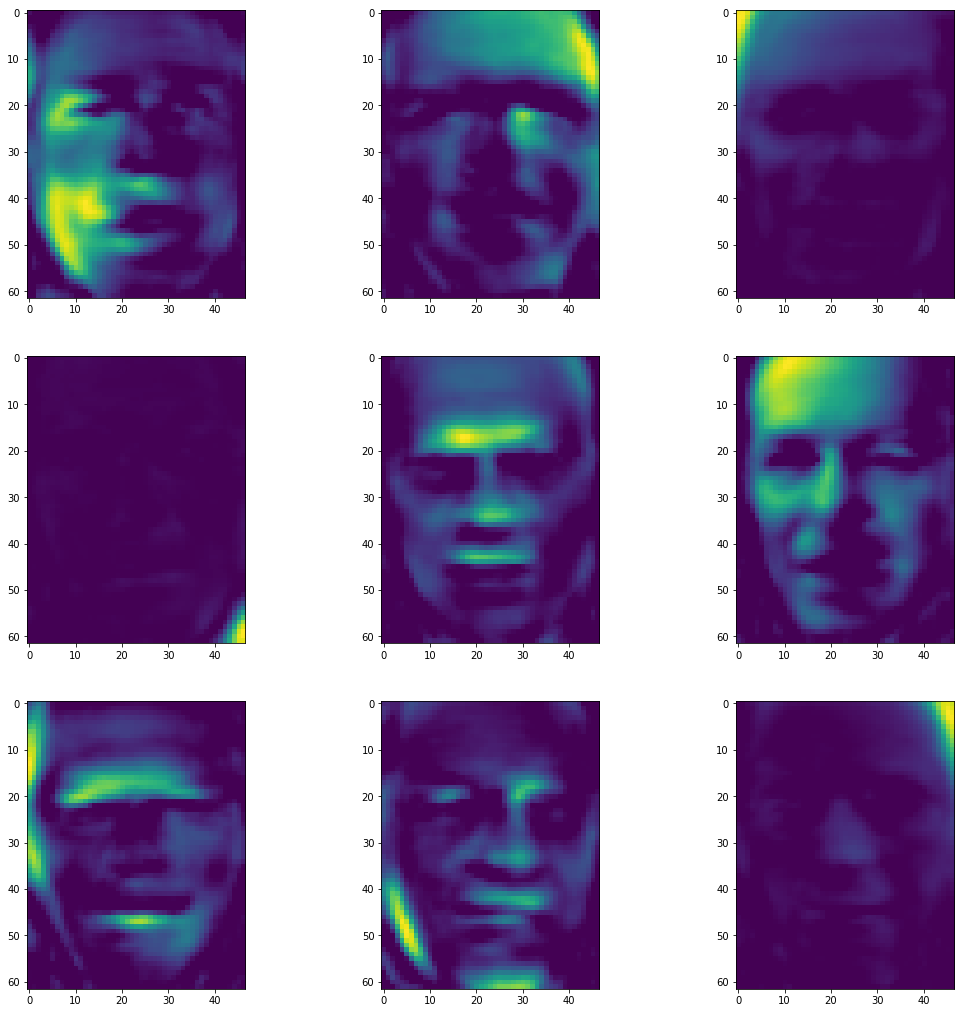

In [8]:
W.resize(rows,cols,n_components)

fig = plt.figure(figsize=(18,18))

for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(W[:,:,i])

Now, let's take a look at the importance of the features (matrix H)